### 1

In [1]:
import numpy as np

def vendermode_matrix(x):
    n = len(x)
    V = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            V[i, j] = x[i] ** j
    return V

x = [-1, 0, 2, 3, 4]
y = [0, 1, 0, 1, 2]

V = vendermode_matrix(x)
y = np.array(y)

# use `np.linalg.solve` to solve the linear system
coefficients = np.linalg.solve(V, y)
for i in range(len(coefficients)):
    print(f"c_{i} = {coefficients[i]}")

c_0 = 1.0000000000000004
c_1 = -0.44999999999999896
c_2 = -0.8249999999999996
c_3 = 0.5499999999999998
c_4 = -0.07499999999999998


### 2

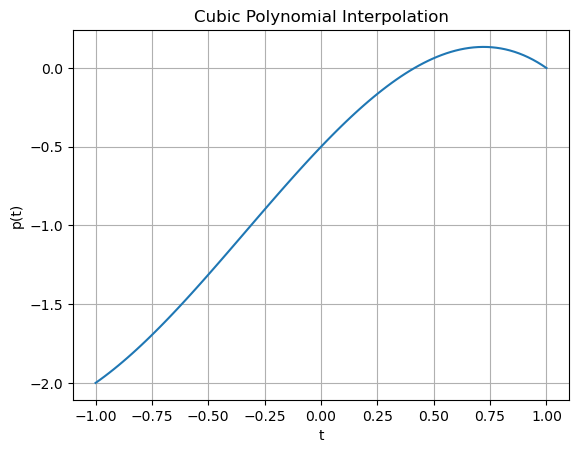

c_0 = -0.5
c_1 = 1.5
c_2 = -0.5
c_3 = -0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [1, -1, 1, -1],
    [0, 1, -2, 3],
    [1, 1, 1, 1],
    [0, 1, 2, 3]
])
y = np.array([-2, 1, 0, -1])

coefficients = np.linalg.solve(A, y)
c_1, c_2, c_3, c_4 = coefficients

# plot
t = np.linspace(-1, 1, 100)
y = c_1 + c_2 * t + c_3 * t**2 + c_4 * t**3

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Cubic Polynomial Interpolation')
plt.grid(True)
plt.show()

for i in range(len(coefficients)):
    print(f"c_{i} = {coefficients[i]}")

### 3

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline

# use cubic spline interpolation by scipy
usa_years = np.array([1980, 2000, 2010, 2020])
usa_pop = np.array([252.120, 281.711, 309.011, 331.003])

cs_usa = CubicSpline(usa_years, usa_pop)
estimate_usa = cs_usa(2005)

print("USA 2005 population estimate:", estimate_usa)

USA 2005 population estimate: 295.384921875


In [4]:
from scipy.optimize import root

poland_years = np.array([1980, 2000, 2010, 2020])
poland_pop = np.array([37.960, 38.557, 38.330, 37.847])

cs_poland = CubicSpline(poland_years, poland_pop)
deriv_poland = cs_poland.derivative()

# solve equation: derivative = 0
solution = root(lambda x: deriv_poland(x), x0=2000)
poland_pop_peak_year = solution.x[0]

print("Poland population peak year:", poland_pop_peak_year)

Poland population peak year: 1997.7468758797127


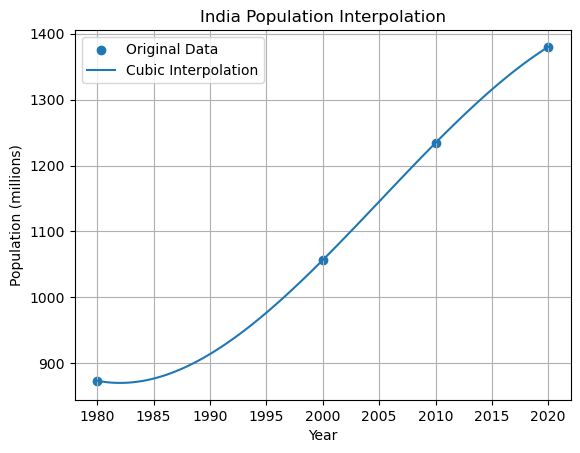

In [5]:
import matplotlib.pyplot as plt

india_years = np.array([1980, 2000, 2010, 2020])
india_pop = np.array([873.278, 1056.576, 1234.281, 1380.004])
cs_india = CubicSpline(india_years, india_pop)

t_plot = np.linspace(1980, 2020, 100)
y_plot = cs_india(t_plot)

plt.scatter(india_years, india_pop, marker='o', label='Original Data')
plt.plot(t_plot, y_plot, label='Cubic Interpolation')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('India Population Interpolation')
plt.legend()
plt.grid(True)
plt.show()

### 4

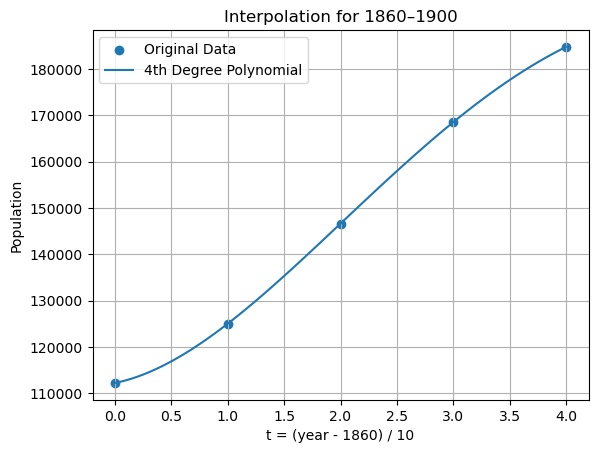

In [6]:
import numpy as np
import matplotlib.pyplot as plt

years_1860_1900 = np.array([1860, 1870, 1880, 1890, 1900])
pop_1860_1900 = np.array([112216, 125015, 146608, 168493, 184735])
t_1860_1900 = np.array([(year - 1860) / 10 for year in years_1860_1900])

V = vendermode_matrix(t_1860_1900)
y = np.array(pop_1860_1900)
coefficients = np.linalg.solve(V, y)
c_1, c_2, c_3, c_4, c_5 = coefficients

t_plot = np.linspace(0, 4, 100)
y_plot = c_1 + c_2 * t_plot + c_3 * t_plot**2 + c_4 * t_plot**3 + c_5 * t_plot**4

plt.scatter(t_1860_1900, pop_1860_1900, marker='o', label='Original Data')
plt.plot(t_plot, y_plot, label='4th Degree Polynomial')
plt.xlabel('t = (year - 1860) / 10')
plt.ylabel('Population')
plt.title('Interpolation for 1860–1900')
plt.legend()
plt.grid(True)
plt.show()

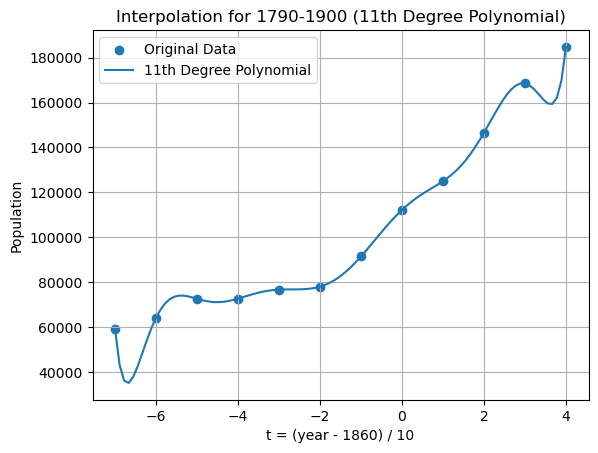

In [ ]:
import sys  # to import some functions we wrote before (in `fnc.py` file)
sys.path.append('./')
sys.path.append('../')
from fnc import polynomial

year_all = np.linspace(1790, 1900, 12)
pop_all = np.array([
    59096, 64273, 72674, 72749, 76748, 78085, 
    91532, 112216, 125015, 146608, 168493, 184735
])
t_all = np.array([(y - 1860) / 10 for y in year_all])

# interpolation used 11th degree polynomial
V = vendermode_matrix(t_all)
y = np.array(pop_all)
coefficients = np.linalg.solve(V, y)

t_plot = np.linspace(t_all.min(), t_all.max(), 100)
y_plot = polynomial(coefficients, t_plot)

plt.scatter(t_all, pop_all, marker='o', label='Original Data')
plt.plot(t_plot, y_plot, label='11th Degree Polynomial')
plt.xlabel('t = (year - 1860) / 10')
plt.ylabel('Population')
plt.title('Interpolation for 1790-1900 (11th Degree Polynomial)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Interpolation by high oder polynomial may be unstable.
# Because the oscillation will be occured at the end of the interval.
# This phenomenon is called Runge phenomenon.